In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata
import cell2location
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

Global seed set to 0


In [2]:
SAMPLE_NAME = "concat_withWu2022"

In [3]:
DIR2SAVE = Path(
    f"/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cellphonedb3/{SAMPLE_NAME}/"
)
DIR2SAVE.mkdir(parents=True, exist_ok=True)

In [4]:
DIR2LOAD = Path(
    f"/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2loc_spatialde2/{SAMPLE_NAME}"
)  # to change
DIR2LOAD.mkdir(parents=True, exist_ok=True)

In [6]:
optimal_s = 1.2
cell2loc_counts = sc.read_h5ad(
    DIR2LOAD.joinpath(f"sp_segmentation_smoothness{optimal_s}.h5ad")
)

In [7]:
# load in gene matrix so we get sample name?
cell2loc_genexp = sc.read_h5ad(
    f"/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2location/{SAMPLE_NAME}/cell2location_map-no_cycling_TME/sp.h5ad"
)

In [8]:
cell2loc_counts.obs.segmentation_labels.value_counts()

9    2666
8    2462
1    2058
4    1972
5    1573
7    1565
6    1074
3    1036
2     880
0     833
Name: segmentation_labels, dtype: int64

In [9]:
# merge to gene exp to get sample and samplename
cell2loc_counts.obs = cell2loc_counts.obs.merge(right=cell2loc_genexp.obs[["Sample"]],
                          how="left",
                          left_index=True,
                          right_index=True
                         )

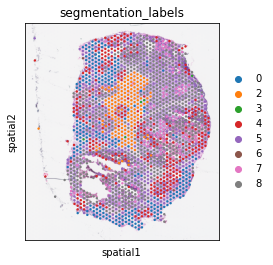

In [10]:
from vistools import utils
slide = utils.select_slide(cell2loc_counts, s="CRC11_LM_VISIUM", batch_key="Sample")
sc.pl.spatial(slide, color="segmentation_labels")

### compute average abundance of each region cluster

Figure shows cell type groups enriched in regions on Visium ST slide. Normalised average cell abundance (dot size and color) for cell types annotated through scRNA-seq analysis across the regions obtained through segmentation using SpatialDE2. 

In [11]:
# compute average abundance of each region cluster
# fct returns pd.DataFrame of cluster average expression of each gene, here we use celltype instead of gene
from cell2location.cluster_averages.cluster_averages import get_cluster_averages_df
from cell2location.plt.plot_heatmap import clustermap

# select only columns that are cell type names
ct_average = get_cluster_averages_df(
    X=cell2loc_counts.obs[[i for i in cell2loc_counts.uns["mod"]["factor_names"]]],
    cluster_col=cell2loc_counts.obs["segmentation_labels"],
)
# ct_average.index = adata_vis.uns['mod']['factor_names']

# to get proportion of cell types in each region, need to normalise by max value of each region?
# normalise average abudance of each cell type by region:
# to get proportion of cell types in each region, need to normalise by max value of each celltype across regions?
# transpose for plotting
ct_average_norm = (ct_average.T / ct_average.max(1)).T

In [12]:
ct_average

,0,1,2,3,4,5,6,7,8,9
B,3.451381,2.999514,188.184091,14.995174,1.838235,1.495868,2.716946,0.568051,2.100731,1.042011
C1QC Mac,1399.457383,283.690962,151.234091,216.104247,24.952333,82.651621,107.822160,1.692652,20.199431,195.530383
C3 iCAF,31.338535,1514.404762,233.396591,2543.592664,4.078093,14.292435,233.015829,10.164856,8.507311,1096.375844
CD4 Tfh,3.643457,2.519922,104.905682,6.570463,0.767748,1.147489,2.117318,0.178275,1.313972,1.307202
CD4 Th,3.366146,3.439261,10.956818,14.172780,0.469574,0.842975,2.050279,0.245367,0.391958,1.706302
CD4 Th HSP,2.440576,2.399417,3.498864,4.236486,0.996450,1.184997,2.070764,0.716294,1.430950,1.741560
CD4 Th17,6.410564,8.181244,83.847727,58.774131,1.164807,1.232676,4.525140,0.610224,0.506093,3.215679
CD4 Tn,4.139256,3.613217,94.667045,22.590734,0.569473,1.060394,2.555866,0.280511,1.079204,1.438110
CD8 Tem,4.205282,3.358115,33.086364,10.944015,0.624239,0.931341,2.013966,0.176997,0.487409,1.874719
CD8 Tem GZMB,7.106843,5.475219,85.526136,25.937259,0.561359,1.152575,2.602421,0.189776,0.434606,2.109152


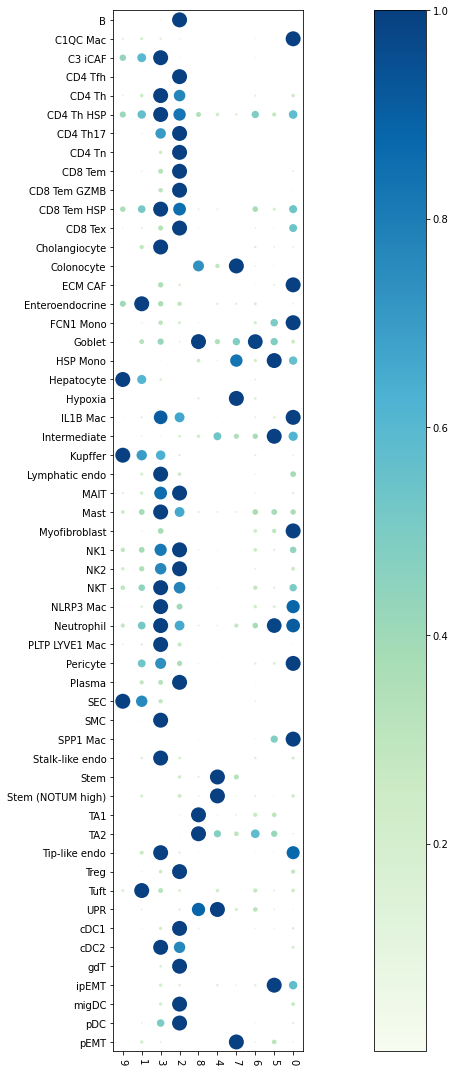

In [13]:
clustermap(
    ct_average_norm,
    cluster_rows=False,
    cluster_cols=True,
    figure_size=[20, 15],
    # figure_size=[5.9 + 0.12 * mod_sk.n_fact, 5.9 + 0.1 * mod_sk.n_var],
    fun_type="dotplot",
    array_size=None,
    cmap="GnBu",
)  # cmap='RdBu'
plt.show()

In [14]:
ct_average_norm

,0,1,2,3,4,5,6,7,8,9
B,0.018340,0.015939,1.000000,0.079684,0.009768,0.007949,0.014438,0.003019,0.011163,0.005537
C1QC Mac,1.000000,0.202715,0.108066,0.154420,0.017830,0.059060,0.077046,0.001210,0.014434,0.139719
C3 iCAF,0.012321,0.595380,0.091759,1.000000,0.001603,0.005619,0.091609,0.003996,0.003345,0.431034
CD4 Tfh,0.034731,0.024021,1.000000,0.062632,0.007318,0.010938,0.020183,0.001699,0.012525,0.012461
CD4 Th,0.237508,0.242667,0.773089,1.000000,0.033132,0.059478,0.144663,0.017313,0.027656,0.120393
CD4 Th HSP,0.576085,0.566370,0.825888,1.000000,0.235207,0.279712,0.488793,0.169077,0.337768,0.411086
CD4 Th17,0.076455,0.097573,1.000000,0.700963,0.013892,0.014701,0.053969,0.007278,0.006036,0.038351
CD4 Tn,0.043724,0.038168,1.000000,0.238634,0.006016,0.011201,0.026998,0.002963,0.011400,0.015191
CD8 Tem,0.127100,0.101495,1.000000,0.330771,0.018867,0.028149,0.060870,0.005350,0.014731,0.056661
CD8 Tem GZMB,0.083096,0.064018,1.000000,0.303267,0.006564,0.013476,0.030428,0.002219,0.005082,0.024661


### select microenvironments you're interested in looking into: here around pEMT, ipEMT and stem:

In [15]:
cluster2look = [0, 5, 7, 4, 2] # 5

In [16]:
ct_average_norm.loc[:, cluster2look]

,0,5,7,4,2
B,0.018340,0.007949,0.003019,0.009768,1.000000
C1QC Mac,1.000000,0.059060,0.001210,0.017830,0.108066
C3 iCAF,0.012321,0.005619,0.003996,0.001603,0.091759
CD4 Tfh,0.034731,0.010938,0.001699,0.007318,1.000000
CD4 Th,0.237508,0.059478,0.017313,0.033132,0.773089
CD4 Th HSP,0.576085,0.279712,0.169077,0.235207,0.825888
CD4 Th17,0.076455,0.014701,0.007278,0.013892,1.000000
CD4 Tn,0.043724,0.011201,0.002963,0.006016,1.000000
CD8 Tem,0.127100,0.028149,0.005350,0.018867,1.000000
CD8 Tem GZMB,0.083096,0.013476,0.002219,0.006564,1.000000


In [17]:
ct_average_norm = ct_average_norm.loc[:, cluster2look]

### Device strategy to get for each cell type (row) in `ct_average_norm` the clusters (columns) it is present greater than user-specified threshold
ct_average_norm

`for each row, 
    return columns if value > thresh`
    
* using a mask: entry in `ct_average_norm` needs to satisfy thresh (tests for presence of each celltype in each cluster region)
* using `pd.melt` function: enables to melt the columns so they become values in the rows (cell type repeated in fct of regions)
* remove rows that contain NaN value --> i.e. discards rows where cell type not in region


In [18]:
ct_average_norm

,0,5,7,4,2
B,0.018340,0.007949,0.003019,0.009768,1.000000
C1QC Mac,1.000000,0.059060,0.001210,0.017830,0.108066
C3 iCAF,0.012321,0.005619,0.003996,0.001603,0.091759
CD4 Tfh,0.034731,0.010938,0.001699,0.007318,1.000000
CD4 Th,0.237508,0.059478,0.017313,0.033132,0.773089
CD4 Th HSP,0.576085,0.279712,0.169077,0.235207,0.825888
CD4 Th17,0.076455,0.014701,0.007278,0.013892,1.000000
CD4 Tn,0.043724,0.011201,0.002963,0.006016,1.000000
CD8 Tem,0.127100,0.028149,0.005350,0.018867,1.000000
CD8 Tem GZMB,0.083096,0.013476,0.002219,0.006564,1.000000


In [19]:
thresh = 0.3

In [20]:
# mask if value in each entry satisfies threshold
celltype_microenv_df = ct_average_norm[ct_average_norm > thresh]

In [21]:
# rename index
celltype_microenv_df.index.name = "cell_type"

In [22]:
# make index a column
celltype_microenv_df.reset_index(inplace=True)

In [23]:
celltype_microenv_df

,cell_type,0,5,7,4,2
0,B,NaN,NaN,NaN,NaN,1.000000
1,C1QC Mac,1.000000,NaN,NaN,NaN,NaN
2,C3 iCAF,NaN,NaN,NaN,NaN,NaN
3,CD4 Tfh,NaN,NaN,NaN,NaN,1.000000
4,CD4 Th,NaN,NaN,NaN,NaN,0.773089
5,CD4 Th HSP,0.576085,NaN,NaN,NaN,0.825888
6,CD4 Th17,NaN,NaN,NaN,NaN,1.000000
7,CD4 Tn,NaN,NaN,NaN,NaN,1.000000
8,CD8 Tem,NaN,NaN,NaN,NaN,1.000000
9,CD8 Tem GZMB,NaN,NaN,NaN,NaN,1.000000


In [24]:
# use melt function to get rows: cell type microenv
# repeat cell type for each column (cluster region)
# then we can remove cell type in regions where value in NaN (i.e. not present with threshold)
celltype_microenv_df_melt = celltype_microenv_df.melt(
    id_vars=["cell_type"],
    value_vars=[col for col in celltype_microenv_df.columns if col != "cell_type"],
    var_name="microenviroment",
)
celltype_microenv_df_melt.head(5)

,cell_type,microenviroment,value
0,B,0,NaN
1,C1QC Mac,0,1.0
2,C3 iCAF,0,NaN
3,CD4 Tfh,0,NaN
4,CD4 Th,0,NaN


In [25]:
# only keep cell types in region that satisfy a threshold
cellltype_microenv_final = celltype_microenv_df_melt[
    celltype_microenv_df_melt["value"].notna()
][["cell_type", "microenviroment"]]

In [26]:
cellltype_microenv_final

,cell_type,microenviroment
1,C1QC Mac,0
5,CD4 Th HSP,0
10,CD8 Tem HSP,0
11,CD8 Tex,0
14,ECM CAF,0
...,...,...
268,cDC1,2
269,cDC2,2
270,gdT,2
272,migDC,2


In [27]:
set(cellltype_microenv_final["microenviroment"])

{0, 2, 4, 5, 7}

In [28]:
cellltype_microenv_final[cellltype_microenv_final["microenviroment"] == 0]

,cell_type,microenviroment
1,C1QC Mac,0
5,CD4 Th HSP,0
10,CD8 Tem HSP,0
11,CD8 Tex,0
14,ECM CAF,0
16,FCN1 Mono,0
18,HSP Mono,0
21,IL1B Mac,0
22,Intermediate,0
24,Lymphatic endo,0


In [29]:
cellltype_microenv_final[cellltype_microenv_final["microenviroment"] == 2]

,cell_type,microenviroment
220,B,2
223,CD4 Tfh,2
224,CD4 Th,2
225,CD4 Th HSP,2
226,CD4 Th17,2
227,CD4 Tn,2
228,CD8 Tem,2
229,CD8 Tem GZMB,2
230,CD8 Tem HSP,2
231,CD8 Tex,2


In [30]:
cellltype_microenv_final[cellltype_microenv_final["microenviroment"] == 4]

,cell_type,microenviroment
182,Goblet,4
187,Intermediate,4
205,Stem,4
206,Stem (NOTUM high),4
208,TA2,4
212,UPR,4


In [31]:
cellltype_microenv_final[cellltype_microenv_final["microenviroment"] == 5]

,cell_type,microenviroment
71,FCN1 Mono,5
72,Goblet,5
73,HSP Mono,5
77,Intermediate,5
81,Mast,5
87,Neutrophil,5
93,SPP1 Mac,5
97,TA1,5
98,TA2,5
106,ipEMT,5


In [32]:
cellltype_microenv_final[cellltype_microenv_final["microenviroment"] == 7]

,cell_type,microenviroment
123,Colonocyte,7
127,Goblet,7
128,HSP Mono,7
130,Hypoxia,7
132,Intermediate,7
150,Stem,7
153,TA2,7
164,pEMT,7


### save microenvironments file for cellphoneDB analysis 

In [33]:
DIR2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cellphonedb3/concat_withWu2022')

In [34]:
cellltype_microenv_final["cell_type"].value_counts()

Intermediate         4
TA2                  3
HSP Mono             3
Goblet               3
Mast                 3
Neutrophil           3
FCN1 Mono            2
NLRP3 Mac            2
CD4 Th HSP           2
CD8 Tem HSP          2
ipEMT                2
IL1B Mac             2
SPP1 Mac             2
Pericyte             2
Stem                 2
NKT                  2
NK1                  2
CD8 Tex              2
pEMT                 2
Plasma               1
MAIT                 1
CD8 Tem GZMB         1
NK2                  1
CD8 Tem              1
cDC1                 1
Treg                 1
CD4 Th17             1
cDC2                 1
gdT                  1
migDC                1
CD4 Tn               1
C1QC Mac             1
CD4 Th               1
CD4 Tfh              1
B                    1
UPR                  1
Stem (NOTUM high)    1
Hypoxia              1
Colonocyte           1
TA1                  1
Tip-like endo        1
Myofibroblast        1
Lymphatic endo       1
ECM CAF    

In [35]:
cellltype_microenv_final.to_csv(
    DIR2SAVE.joinpath("microenviroments_cell2loc_spatialde2.tsv"), sep="\t", index=False
)